# **DICODING MACHINE LEARNING UNTUK PEMULA**
# **MEGA MUSFIVAWATI**
**musfivawati@gmail.com**


In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-06 17:17:38--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.47MB/s    in 52s     

2020-11-06 17:18:31 (5.97 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [3]:
os.mkdir('/tmp/s/')
os.mkdir('/tmp/s/train/')
os.mkdir('/tmp/s/val/')
os.mkdir('/tmp/s/train/rock/')
os.mkdir('/tmp/s/val/rock/')
os.mkdir('/tmp/s/train/paper/')
os.mkdir('/tmp/s/val/paper/')
os.mkdir('/tmp/s/train/scissors/')
os.mkdir('/tmp/s/val/scissors/')

import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

train_ratio = 0.6

#Pembagian Training dan Validasi

source_rock = '/tmp/rockpaperscissors/rock/'
train_rock = '/tmp/s/train/rock/'
val_rock = '/tmp/s/val/rock/'
train_val_split(source_rock, train_rock, val_rock, train_ratio)

source_paper = '/tmp/rockpaperscissors/paper/'
train_paper = '/tmp/s/train/paper/'
val_paper = '/tmp/s/val/paper/'
train_val_split(source_paper, train_paper, val_paper, train_ratio)

source_scissors = '/tmp/rockpaperscissors/scissors/'
train_scissors = '/tmp/s/train/scissors/'
val_scissors = '/tmp/s/val/scissors/'
train_val_split(source_scissors, train_scissors, val_scissors, train_ratio)

In [4]:
#augmentasi
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    zoom_range = 0.1
                    )
val_datagen = ImageDataGenerator(
                rescale = 1./255.,
                rotation_range=20,
                horizontal_flip=True,
                shear_range = 0.2,
                fill_mode = 'wrap',
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                zoom_range = 0.1
)

In [5]:
train_dir = '/tmp/s/train/'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    shuffle=True,
)

val_dir = '/tmp/s/val/'
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [6]:
#callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training = True

callbacks = myCallback()

In [7]:
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [8]:
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

history= model.fit(
         train_generator,
         steps_per_epoch=32, 
         epochs=20,
         validation_data=val_generator, 
         validation_steps=3,  
         verbose=2,
         callbacks = [callbacks]
         )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 16)       448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 15, 128)        7

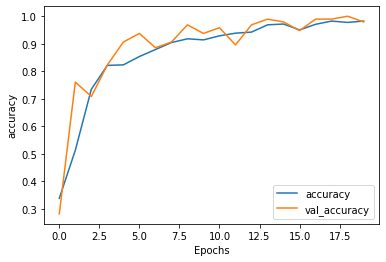

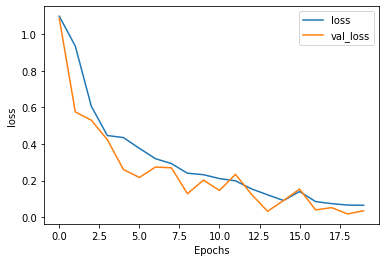

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()
  
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Saving 0a3UtNzl5Ll3sq8K.png to 0a3UtNzl5Ll3sq8K.png
0a3UtNzl5Ll3sq8K.png
paper


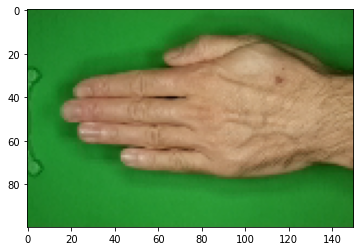

In [10]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  path=fn
  img=image.load_img(path,target_size=(100,150))
  imgplot = plt.imshow(img)
  x= image.img_to_array(img)
  x=np.expand_dims(x,axis=0)

  images = np.vstack([x])
  
  classes = model.predict(images,batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown') 